# QUESTION 1

## Data mining as we know deals with finding insights from large data. UN is studying the general sentiment about gender, for this task collect social media data from any platform that could help you get this done. For your submission, upload the notebook and a pdf report

In [1]:
# Import the necessary libraries
import praw  # Python Reddit API Wrapper for interacting with Reddit's API
import pandas as pd  # For data handling and creating dataframes

# Initialize the Reddit API with your personal credentials
# Replace the values below with your own app credentials from Reddit's developer portal
reddit = praw.Reddit(
    client_id="1q-pYrRTtrbfR7Ycw0v0AQ",             # Your Reddit app's client ID
    client_secret="Pf7D4Ihtq91ovpPmgNhyK2PVOlSZMg",  # Your Reddit app's secret key
    user_agent="GenderSentimentMining/0.1 by Fluffy-Help8380",  # Description of the app (used for tracking)
    username="Fluffy-Help8380",                     # Your Reddit username
    password="0773103621a"                          # Your Reddit password
)

# Define a function to collect Reddit posts from a specific subreddit
def get_reddit_posts(subreddit_name, keyword, limit=100):
    posts = []  # Initialize an empty list to store post data
    # Search for posts in the specified subreddit containing the keyword
    for submission in reddit.subreddit(subreddit_name).search(keyword, limit=limit):
        posts.append({
            "title": submission.title,  # Title of the post
            "selftext": submission.selftext,  # Body/content of the post
            "score": submission.score,  # Upvotes on the post
            "created_utc": pd.to_datetime(submission.created_utc, unit='s'),  # Date of creation (converted to readable format)
            "url": submission.url  # Direct URL to the post
        })
    # Return the list of posts as a pandas DataFrame for easier analysis
    return pd.DataFrame(posts)

# Example usage of the function
# Fetch 100 posts from r/TwoXChromosomes containing the keyword "gender"
df = get_reddit_posts("TwoXChromosomes", "gender", limit=100)

# Display the first 5 posts in the DataFrame
print(df.head())

                                               title  \
0  Bill allowing doctors to inspect children’s ge...   
1  The sedation gender disparity bothers me as a ...   
2  Doublespeak--> Executive Order: DEFENDING WOME...   
3  Someone assumed I was a transwoman, pitched me...   
4  Japan falls to record low 125th place is gende...   

                                            selftext  score  \
0  Parental consent is not required. An amendment...   8467   
1  So full disclosure. I am a male physician. Par...   5609   
2  Included in the order is the command to rescin...   3285   
3  This past weekend, I (a cis woman) was at Prid...   4139   
4  And of course the majority of people piping in...   8506   

          created_utc                                                url  
0 2025-03-11 18:22:40  https://www.wdtv.com/2025/03/11/bill-requiring...  
1 2024-07-31 15:16:58  https://www.reddit.com/r/TwoXChromosomes/comme...  
2 2025-01-21 16:13:27  https://www.whitehouse.gov/president

## Combine Title + SelfText

In [2]:
# Create a new column called 'content' by combining the 'title' and 'selftext' (post body)
# This gives us one unified text field per post for easier analysis later (like cleaning, sentiment, etc.)
df["content"] = df["title"] + " " + df["selftext"]

## Clean the Text

In [3]:
# Import required libraries
import re  # Regular expressions for pattern matching and cleaning text
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # Common stopwords like "the", "is", etc.

# Load English stopwords into a set for fast lookup
stop_words = set(stopwords.words('english'))

# Define a function to clean the text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z ]", "", text)  # Remove all non-alphabetic characters (e.g., numbers, punctuation)
    text = text.lower()  # Convert text to lowercase
    words = text.split()  # Tokenize the text (split into words)
    words = [word for word in words if word not in stop_words]  # Remove common English stopwords
    return " ".join(words)  # Join the cleaned words back into a single string

# Apply the cleaning function to the 'content' column and store it in a new column 'cleaned_content'
df["cleaned_content"] = df["content"].apply(clean_text)

## Sentiment Analysis With VADER

In [4]:
# Import the SentimentIntensityAnalyzer from VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of a given text
def get_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]  # Get the compound sentiment score
    if score >= 0.05:
        return "Positive"  # Positive sentiment
    elif score <= -0.05:
        return "Negative"  # Negative sentiment
    else:
        return "Neutral"  # Neutral sentiment

# Apply the sentiment classification function to the cleaned text
df["sentiment"] = df["cleaned_content"].apply(get_sentiment)

## Visualize the Sentiment Distribution

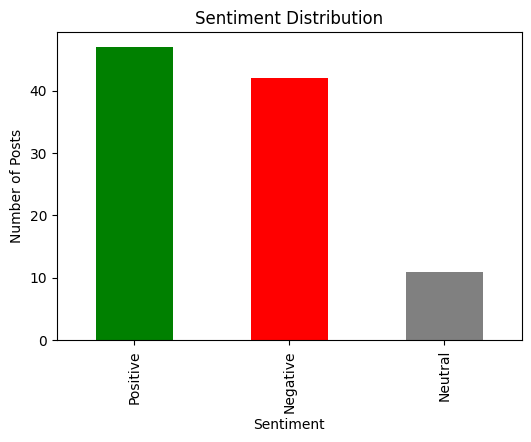

In [5]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Count the number of posts per sentiment (Positive, Negative, Neutral)
sentiment_counts = df["sentiment"].value_counts()

# Create a bar chart to show sentiment distribution
plt.figure(figsize=(6, 4))  # Set the figure size (width, height)
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])  # Create a bar chart with color coding

# Add titles and labels
plt.title("Sentiment Distribution")  # Chart title
plt.xlabel("Sentiment")  # X-axis label
plt.ylabel("Number of Posts")  # Y-axis label

# Show the chart
plt.show()

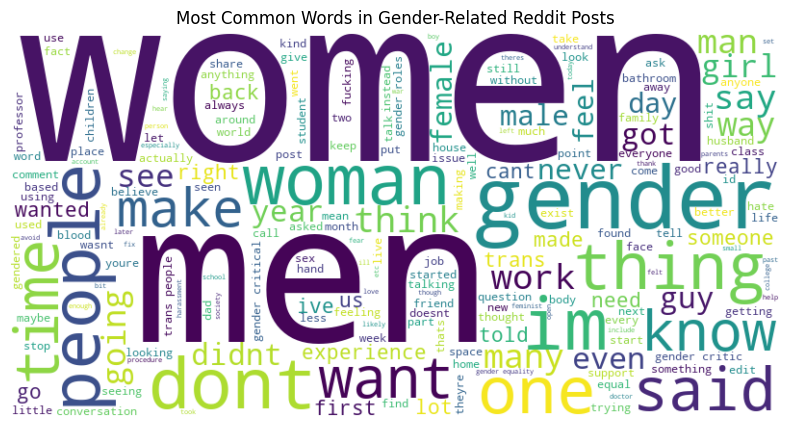

In [6]:
# Import WordCloud for visualization
from wordcloud import WordCloud

# Combine all cleaned post content into a single string
all_words = " ".join(df["cleaned_content"])

# Generate the word cloud using the combined words
wordcloud = WordCloud(
    width=800,               # Width of the image
    height=400,              # Height of the image
    background_color='white' # Background color of the image
).generate(all_words)

# Plot the generated word cloud
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the image
plt.axis('off')  # Remove axes
plt.title("Most Common Words in Gender-Related Reddit Posts")  # Add title
plt.show()

## Pie Chart for Sentiment Distribution

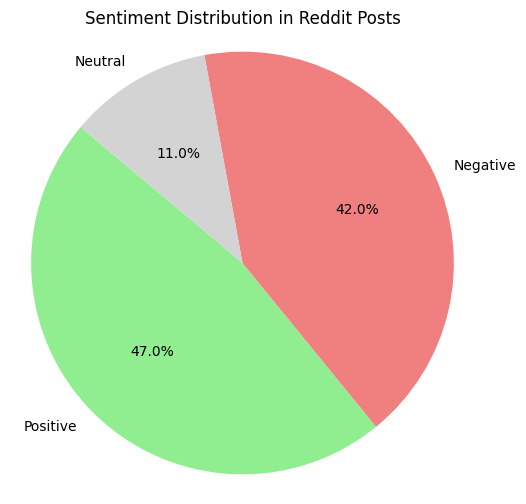

In [7]:
# Count the number of posts in each sentiment category
sentiment_counts = df["sentiment"].value_counts()

# Define colors for each sentiment slice
colors = ['lightgreen', 'lightcoral', 'lightgray']  # Green = Positive, Red = Negative, Gray = Neutral

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(
    sentiment_counts,                      # The sentiment counts as data
    labels=sentiment_counts.index,         # Label each slice with the sentiment name
    autopct='%1.1f%%',                     # Show percentage on each slice
    colors=colors,                         # Apply custom colors
    startangle=140                         # Start angle for better orientation
)

# Add title and display options
plt.title("Sentiment Distribution in Reddit Posts")
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

## Keyword cocurrence Graph

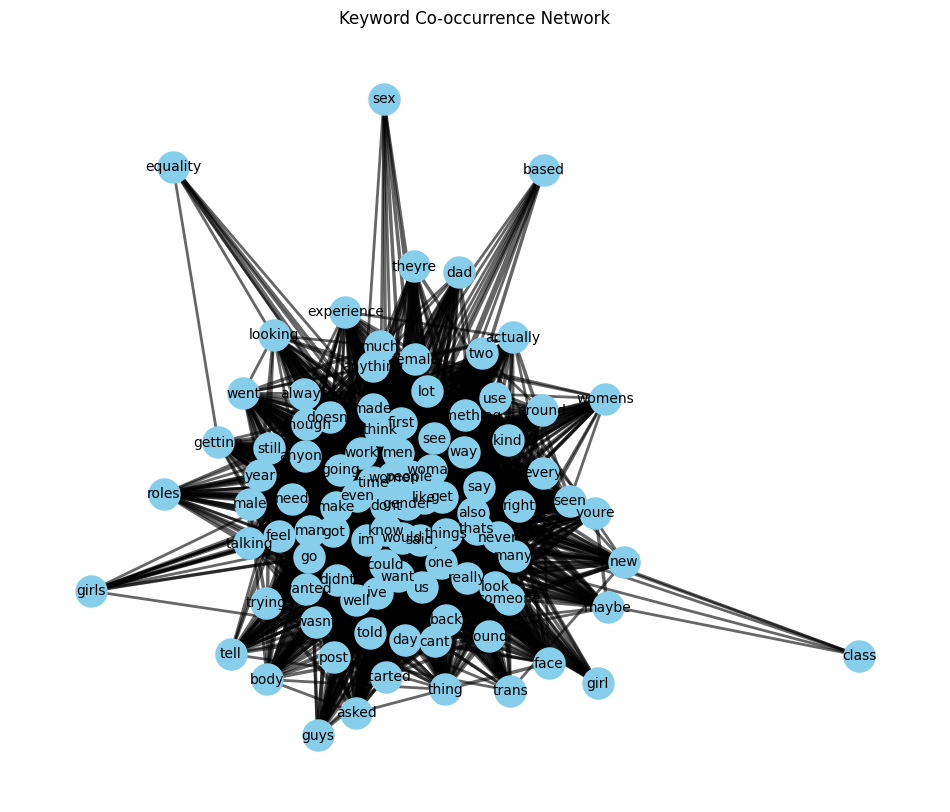

In [8]:
# Import networkx for graph generation and other helpers
import networkx as nx
from collections import Counter
from itertools import combinations

# Get individual word lists from cleaned text
words = [text.split() for text in df["cleaned_content"]]

# Flatten the list of all words from all posts
all_words_flat = [word for sublist in words for word in sublist]

# Get the 100 most common words
common_words = [word for word, count in Counter(all_words_flat).most_common(100)]

# Initialize co-occurrence counter
co_occurrence = Counter()

# Count word pairs that co-occur in each post
for word_list in words:
    filtered_words = [word for word in word_list if word in common_words]  # Only keep top common words
    pairs = combinations(set(filtered_words), 2)  # Get all unique word pairs
    co_occurrence.update(pairs)  # Update frequency count

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph with weights (co-occurrence frequency)
for (w1, w2), freq in co_occurrence.items():
    if freq > 3:  # Only include connections that appear more than 3 times
        G.add_edge(w1, w2, weight=freq)

# Draw the network graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)  # Layout positioning
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]  # Get weights for edge thickness

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w/2 for w in weights], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Final touches
plt.title("Keyword Co-occurrence Network")
plt.axis('off')  # Hide axes
plt.show()